In [1]:
from pathlib import Path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize
import scipy.optimize
from scipy.optimize import minimize
#from scipy.ndimage import gaussian_filter1d
import sys

In [2]:
date = '20211206'
dataNo = 5
scanNo = 5

In [3]:
path = r"./"+date
path_img = path + r"/data" + str('%03d' % dataNo) + "/raw"
path_scan = path + r"/scandir/Scan" + str('%03d' % scanNo) + '.txt'
path_param = path + r"/scandir/Parameters" + str('%03d' % scanNo) + '.txt'
scan_data = pd.read_csv(path_scan, delimiter='\t')

In [4]:
cx = 55
cy = 61
wx = 4
wy = 4
x0 = cx-wx; x1 = cx+wx
y0 = cy-wy; y1 = cy+wy
x=np.arange(x0,x1)
y=np.arange(y0,y1)
xmesh, ymesh = np.meshgrid(x,y)

r1_cx = cx+24
r1_cy = cy-2
r1_wx = 4
r1_wy = 4
r1_x0 = r1_cx-r1_wx; r1_x1 = r1_cx+r1_wx
r1_y0 = r1_cy-r1_wy; r1_y1 = r1_cy+r1_wy
r1_x=np.arange(r1_x0,r1_x1)
r1_y=np.arange(r1_y0,r1_y1)
r1_xmesh, r1_ymesh = np.meshgrid(r1_x,r1_y)

r2_cx = cx-21
r2_cy = cy+5
r2_wx = 4
r2_wy = 4
r2_x0 = r2_cx-r2_wx; r2_x1 = r2_cx+r2_wx
r2_y0 = r2_cy-r2_wy; r2_y1 = r2_cy+r2_wy
r2_x=np.arange(r2_x0,r2_x1)
r2_y=np.arange(r2_y0,r2_y1)
r2_xmesh, r2_ymesh = np.meshgrid(r2_x,r2_y)

r3_cx = cx+9
r3_cy = cy-18
r3_wx = 4
r3_wy = 4
r3_x0 = r3_cx-r3_wx; r3_x1 = r3_cx+r3_wx
r3_y0 = r3_cy-r3_wy; r3_y1 = r3_cy+r3_wy
r3_x=np.arange(r3_x0,r3_x1)
r3_y=np.arange(r3_y0,r3_y1)
r3_xmesh, r3_ymesh = np.meshgrid(r3_x,r3_y)

r4_cx = cx-7
r4_cy = cy+20
r4_wx = 4
r4_wy = 4
r4_x0 = r4_cx-r4_wx; r4_x1 = r4_cx+r4_wx
r4_y0 = r4_cy-r4_wy; r4_y1 = r4_cy+r4_wy
r4_x=np.arange(r4_x0,r4_x1)
r4_y=np.arange(r4_y0,r4_y1)
r4_xmesh, r4_ymesh = np.meshgrid(r4_x,r4_y)

r5_cx = cx+16
r5_cy = cy+16
r5_wx = 4
r5_wy = 4
r5_x0 = r5_cx-r5_wx; r5_x1 = r5_cx+r5_wx
r5_y0 = r5_cy-r5_wy; r5_y1 = r5_cy+r5_wy
r5_x=np.arange(r5_x0,r5_x1)
r5_y=np.arange(r5_y0,r5_y1)
r5_xmesh, r5_ymesh = np.meshgrid(r5_x,r5_y)

r6_cx = cx-15
r6_cy = cy-15
r6_wx = 4
r6_wy = 4
r6_x0 = r6_cx-r6_wx; r6_x1 = r6_cx+r6_wx
r6_y0 = r6_cy-r6_wy; r6_y1 = r6_cy+r6_wy
r6_x=np.arange(r6_x0,r6_x1)
r6_y=np.arange(r6_y0,r6_y1)
r6_xmesh, r6_ymesh = np.meshgrid(r6_x,r6_y)


In [5]:
param_name = 'T0049: LS ramp up time (usec.)'
scan_param = scan_data[param_name]
sample1 = 20
sample2 = 1900 
sample3 = 3400
unit = '[us]'

In [6]:
share = Path(path_img)
if share.exists():
    trans_files = list(Path(path_img).glob('seq*_trans001.tiff'))
    flat_files = list(Path(path_img).glob('seq*_flat001.tiff'))
    update_files = list(Path(path_img).glob('seq*_update001.tiff'))
else:
    print(No)

img_flat_ave =[]
img_trans_ave = []
img_trans_list = []
for N in range(len(trans_files)):
    img_flat_ave += [np.array(Image.open(flat_files[N]))]
    img_trans_ave += [np.array(Image.open(trans_files[N]))]
img_flat_ave = np.average(img_flat_ave,axis=0)
img_trans_ave =np.average(img_trans_ave,axis=0) -img_flat_ave
for N in range(len(trans_files)):
    img_trans_list += [np.array(Image.open(trans_files[N])) - img_flat_ave]

img_trans_sample1 = []
img_trans_sample2 = []
img_trans_sample3 = []
for N in range(len(trans_files)):
    if scan_param[N] == sample1:
        img_trans_sample1 += [np.array(Image.open(trans_files[N]))]
    elif scan_param[N] == sample2:
        img_trans_sample2 += [np.array(Image.open(trans_files[N]))]
    elif scan_param[N] == sample3:
        img_trans_sample3 += [np.array(Image.open(trans_files[N]))]
img_trans_sample1 = np.average(img_trans_sample1,axis=0) -img_flat_ave
img_trans_sample2 = np.average(img_trans_sample2,axis=0) -img_flat_ave
img_trans_sample3 = np.average(img_trans_sample3,axis=0) -img_flat_ave

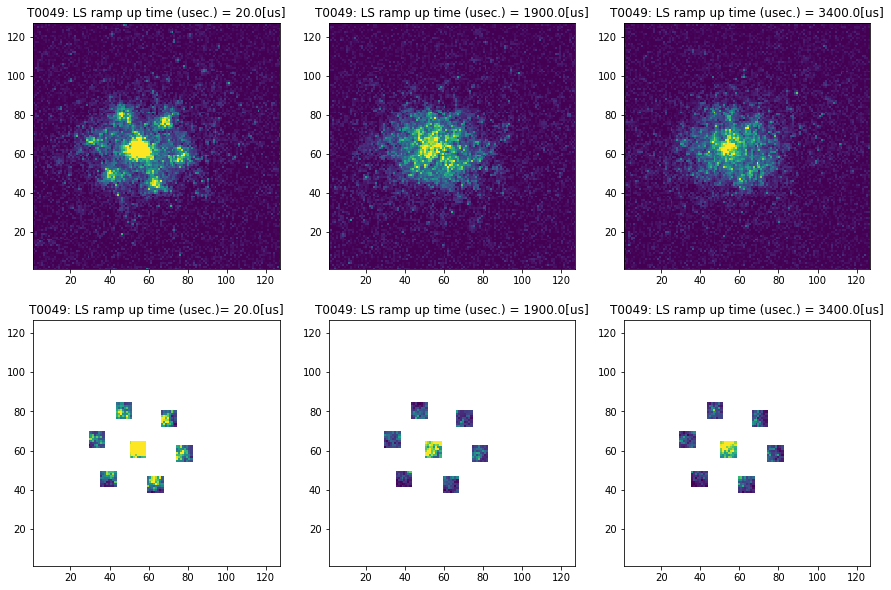

In [7]:



fig =plt.figure(figsize=[15,10])
ax1 = fig.add_subplot(2,3,1)
mappable =ax1.pcolormesh(img_trans_sample1, vmin=0, vmax=5000, shading='auto')
ax1.set_aspect('equal')
ax1.set_xlim(1,127)
ax1.set_ylim(1,127)
ax1.set_title(param_name+ " = %.01f"%(sample1)+unit)

ax2 = fig.add_subplot(2,3,2)
mappable =ax2.pcolormesh(img_trans_sample2, vmin=0, vmax=5000, shading='auto')
ax2.set_aspect('equal')
ax2.set_xlim(1,127)
ax2.set_ylim(1,127)
ax2.set_title(param_name+" = %.01f"%(sample2)+unit)

ax3 = fig.add_subplot(2,3,3)
mappable =ax3.pcolormesh(img_trans_sample3, vmin=0, vmax=5000, shading='auto')
ax3.set_aspect('equal')
ax3.set_xlim(1,127)
ax3.set_ylim(1,127)
ax3.set_title(param_name+ " = %.01f"%(sample3)+unit)

ax4 = fig.add_subplot(2,3,4)
mappable =ax4.pcolormesh(xmesh,ymesh,img_trans_sample1[y0:y1,x0:x1], vmin=0, vmax=5000, shading='auto')
ax4.pcolormesh(r1_xmesh,r1_ymesh,img_trans_sample1[r1_y0:r1_y1,r1_x0:r1_x1], vmin=0, vmax=5000, shading='auto')
ax4.pcolormesh(r2_xmesh,r2_ymesh,img_trans_sample1[r2_y0:r2_y1,r2_x0:r2_x1], vmin=0, vmax=5000, shading='auto')
ax4.pcolormesh(r3_xmesh,r3_ymesh,img_trans_sample1[r3_y0:r3_y1,r3_x0:r3_x1], vmin=0, vmax=5000, shading='auto')
ax4.pcolormesh(r4_xmesh,r4_ymesh,img_trans_sample1[r4_y0:r4_y1,r4_x0:r4_x1], vmin=0, vmax=5000, shading='auto')
ax4.pcolormesh(r5_xmesh,r5_ymesh,img_trans_sample1[r5_y0:r5_y1,r5_x0:r5_x1], vmin=0, vmax=5000, shading='auto')
ax4.pcolormesh(r6_xmesh,r6_ymesh,img_trans_sample1[r6_y0:r6_y1,r6_x0:r6_x1], vmin=0, vmax=5000, shading='auto')
ax4.set_aspect('equal')
ax4.set_xlim(1,127)
ax4.set_ylim(1,127)
ax4.set_title(param_name+"= %.01f"%(sample1)+unit)

ax5 = fig.add_subplot(2,3,5)
mappable =ax5.pcolormesh(xmesh,ymesh,img_trans_sample2[y0:y1,x0:x1], vmin=0, vmax=5000, shading='auto')
ax5.pcolormesh(r1_xmesh,r1_ymesh,img_trans_sample2[r1_y0:r1_y1,r1_x0:r1_x1], vmin=0, vmax=5000, shading='auto')
ax5.pcolormesh(r2_xmesh,r2_ymesh,img_trans_sample2[r2_y0:r2_y1,r2_x0:r2_x1], vmin=0, vmax=5000, shading='auto')
ax5.pcolormesh(r3_xmesh,r3_ymesh,img_trans_sample2[r3_y0:r3_y1,r3_x0:r3_x1], vmin=0, vmax=5000, shading='auto')
ax5.pcolormesh(r4_xmesh,r4_ymesh,img_trans_sample2[r4_y0:r4_y1,r4_x0:r4_x1], vmin=0, vmax=5000, shading='auto')
ax5.pcolormesh(r5_xmesh,r5_ymesh,img_trans_sample2[r5_y0:r5_y1,r5_x0:r5_x1], vmin=0, vmax=5000, shading='auto')
ax5.pcolormesh(r6_xmesh,r6_ymesh,img_trans_sample2[r6_y0:r6_y1,r6_x0:r6_x1], vmin=0, vmax=5000, shading='auto')
ax5.set_aspect('equal')
ax5.set_xlim(1,127)
ax5.set_ylim(1,127)
ax5.set_title(param_name+" = %.01f"%(sample2)+unit)

ax6 = fig.add_subplot(2,3,6)
mappable =ax6.pcolormesh(xmesh,ymesh,img_trans_sample3[y0:y1,x0:x1], vmin=0, vmax=5000, shading='auto')
ax6.pcolormesh(r1_xmesh,r1_ymesh,img_trans_sample3[r1_y0:r1_y1,r1_x0:r1_x1], vmin=0, vmax=5000, shading='auto')
ax6.pcolormesh(r2_xmesh,r2_ymesh,img_trans_sample3[r2_y0:r2_y1,r2_x0:r2_x1], vmin=0, vmax=5000, shading='auto')
ax6.pcolormesh(r3_xmesh,r3_ymesh,img_trans_sample3[r3_y0:r3_y1,r3_x0:r3_x1], vmin=0, vmax=5000, shading='auto')
ax6.pcolormesh(r4_xmesh,r4_ymesh,img_trans_sample3[r4_y0:r4_y1,r4_x0:r4_x1], vmin=0, vmax=5000, shading='auto')
ax6.pcolormesh(r5_xmesh,r5_ymesh,img_trans_sample3[r5_y0:r5_y1,r5_x0:r5_x1], vmin=0, vmax=5000, shading='auto')
ax6.pcolormesh(r6_xmesh,r6_ymesh,img_trans_sample3[r6_y0:r6_y1,r6_x0:r6_x1], vmin=0, vmax=5000, shading='auto')
ax6.set_aspect('equal')
ax6.set_xlim(1,127)
ax6.set_ylim(1,127)
ax6.set_title(param_name+" = %.01f"%(sample3)+unit)


plt.show()

In [8]:
unique_param = scan_param.unique()
center_list = []
side1_list = []
side2_list = []
side3_list = []
center_err_list = []
side1_err_list = []
side2_err_list = []
side3_err_list = []  
for i in range(len(unique_param)):
    # print(unique_param[i])
    center_temp = []
    side1_temp = []
    side2_temp = []
    side3_temp = []
    for j in range(len(trans_files)):
        if scan_param[j] == unique_param[i]:
            # print(np.sum(img_trans_list[j][y0:y1,x0:x1])/np.sum(img_trans_list[j]))
            center_temp.append(np.sum(img_trans_list[j][y0:y1,x0:x1])/np.sum(img_trans_list[j]))
            side1_temp.append((np.sum(img_trans_list[j][r1_y0:r1_y1,r1_x0:r1_x1])+np.sum(img_trans_list[j][r2_y0:r2_y1,r2_x0:r2_x1]))/np.sum(img_trans_list[j]))
            side2_temp.append((np.sum(img_trans_list[j][r3_y0:r3_y1,r3_x0:r3_x1])+np.sum(img_trans_list[j][r4_y0:r4_y1,r4_x0:r4_x1]))/np.sum(img_trans_list[j]))
            side3_temp.append((np.sum(img_trans_list[j][r5_y0:r5_y1,r5_x0:r5_x1])+np.sum(img_trans_list[j][r6_y0:r6_y1,r6_x0:r6_x1]))/np.sum(img_trans_list[j]))
    center_list.append(np.mean(center_temp))
    side1_list.append(np.mean(side1_temp))
    side2_list.append(np.mean(side2_temp))
    side3_list.append(np.mean(side3_temp))
    center_err_list.append(np.std(center_temp))
    side1_err_list.append(np.std(side1_temp))
    side2_err_list.append(np.std(side2_temp))
    side3_err_list.append(np.std(side3_temp))


In [9]:
# x_list = np.linspace(np.min(unique_param),np.max(unique_param),100)
# z_center = np.polyfit(unique_param,center_list,7)
# p_center = np.poly1d(z_center)
# z_side1 = np.polyfit(unique_param,side1_list,7)
# p_side1 = np.poly1d(z_side1)
# center_min = minimize(p_center, x0=1800)
# center_max = minimize(-p_center,x0=3500)
# side1_min = minimize(p_side1, x0=1800)
# side1_max = minimize(-p_side1, x0=3500)

unique_param=unique_param*1e-3
x_list = np.linspace(np.min(unique_param),np.max(unique_param),100)
z_center = np.polyfit(unique_param,center_list,7)
p_center = np.poly1d(z_center)
z_side1 = np.polyfit(unique_param,side1_list,7)
p_side1 = np.poly1d(z_side1)
center_min = minimize(p_center, x0=1.5)
center_max = minimize(-p_center,x0=3.5)
side1_min = minimize(p_side1, x0=1.8)
side1_max = minimize(-p_side1, x0=3.5)

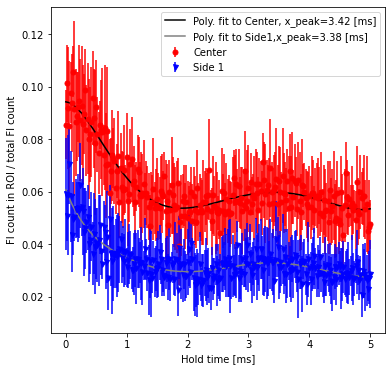

In [10]:
fig =plt.figure(figsize=[6,6])
ax1 = fig.add_subplot(1,1,1)
ax1.errorbar(unique_param,center_list,center_err_list,fmt='o',c='r',markersize=5,label='Center')
ax1.errorbar(unique_param,side1_list,side1_err_list, fmt='v',c='b',markersize=5,label='Side 1')
# ax1.errorbar(unique_param,side2_list,side2_err_list, fmt='^',c='g',markersize=5,label='Side 2')
# ax1.errorbar(unique_param,side3_list,side3_err_list,fmt='D',c='m',markersize=5,label='Side 3')
ax1.plot(x_list,p_center(x_list),c='black',label='Poly. fit to Center, x_peak=%.02f [ms]'%(center_max['x']))
ax1.plot(x_list,p_side1(x_list),c='gray',label='Poly. fit to Side1,x_peak=%.02f [ms]'%(side1_max['x']))
ax1.set_xlabel("Hold time [ms]")
ax1.set_ylabel('Fl count in ROI / total Fl count')
ax1.legend()